In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
df =pd.read_csv("C:\\RANDOM FOREST-nAVIE BAYES\\usa_rain_prediction_dataset_2024_2025.csv")
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,0
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,0
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,0
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,0
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,0
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,0
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [188]:
df['Rain Tomorrow']=1
df

,Date,Location,Temperature,Humidity,Wind Speed,Precipitation,Cloud Cover,Pressure,Rain Tomorrow
0,2024-01-01,New York,87.524795,75.655455,28.379506,0.000000,69.617966,1026.030278,1
1,2024-01-02,New York,83.259325,28.712617,12.436433,0.526995,41.606048,995.962065,1
2,2024-01-03,New York,80.943050,64.740043,14.184831,0.916884,77.364763,980.796739,1
3,2024-01-04,New York,78.097552,59.738984,19.444029,0.094134,52.541196,979.012163,1
4,2024-01-05,New York,37.059963,34.766784,3.689661,1.361272,85.584000,1031.790859,1
...,...,...,...,...,...,...,...,...,...
73095,2025-12-27,Washington D.C.,40.614393,65.099438,28.778327,0.000000,54.168514,977.083747,1
73096,2025-12-28,Washington D.C.,52.641643,30.610525,12.282890,0.871000,22.068055,980.591675,1
73097,2025-12-29,Washington D.C.,56.492591,96.740232,2.894762,1.191956,52.336048,1016.469174,1
73098,2025-12-30,Washington D.C.,65.748956,63.900004,24.632400,0.483421,76.785280,1032.396146,1


In [170]:
df.shape

(73100, 9)

In [171]:
df.isnull().sum()

Date             0
Location         0
Temperature      0
Humidity         0
Wind Speed       0
Precipitation    0
Cloud Cover      0
Pressure         0
Rain Tomorrow    0
dtype: int64

In [172]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Humidity', ylabel='Count'>

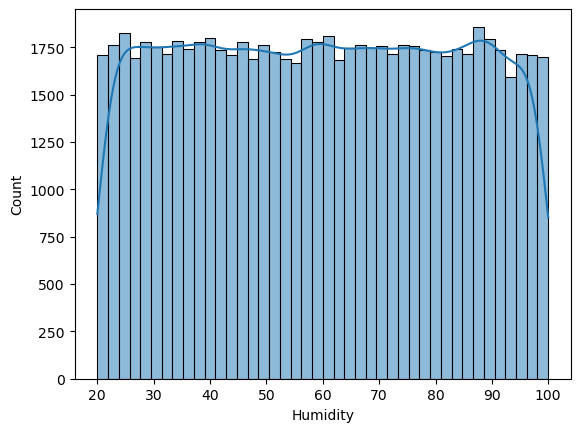

In [173]:
sns.histplot(df["Humidity"],kde=True)

<Axes: xlabel='Temperature', ylabel='Count'>

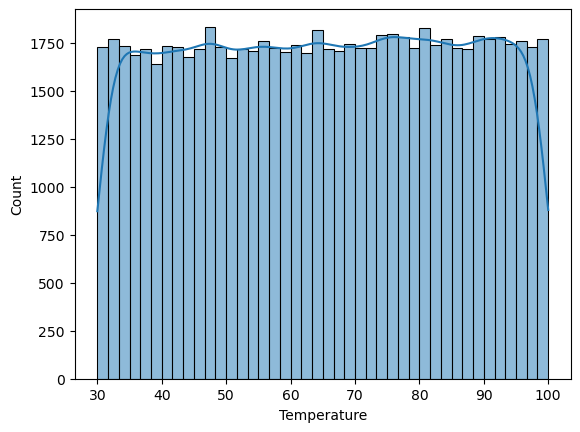

In [174]:
sns.histplot(df["Temperature"],kde=True)

<Axes: xlabel='Wind Speed', ylabel='Count'>

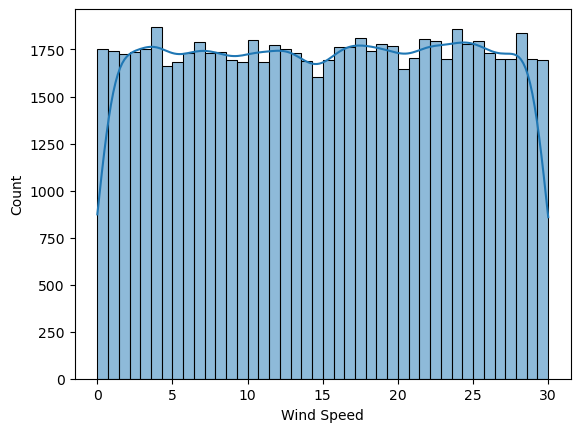

In [175]:
sns.histplot(df["Wind Speed"],kde=True)

<Axes: xlabel='Pressure', ylabel='Count'>

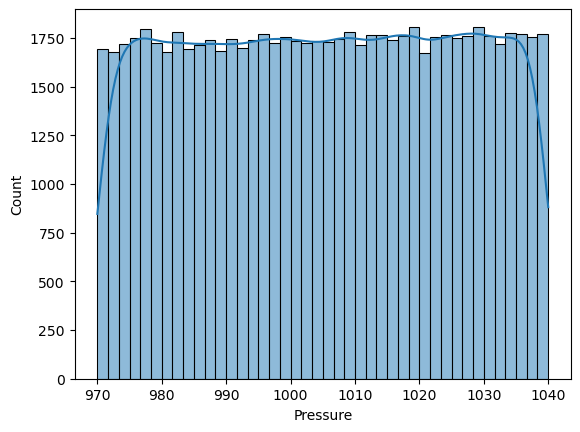

In [176]:
sns.histplot(df["Pressure"],kde=True)

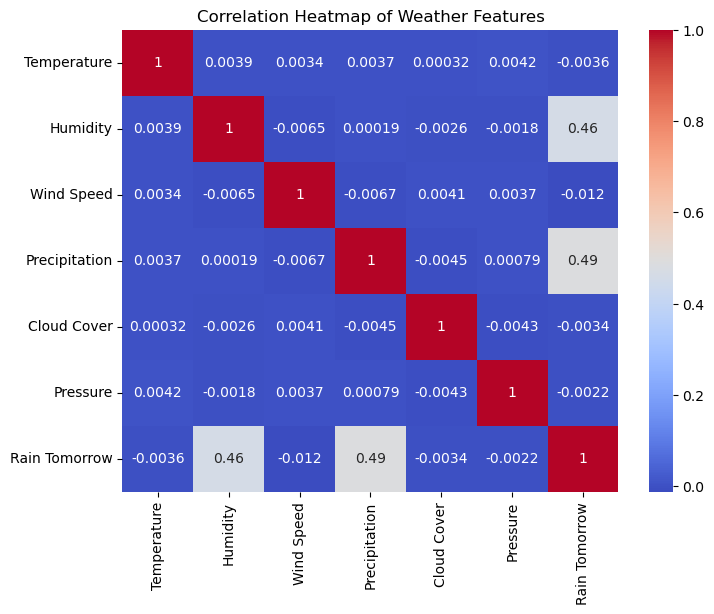

In [177]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Weather Features")
plt.show()


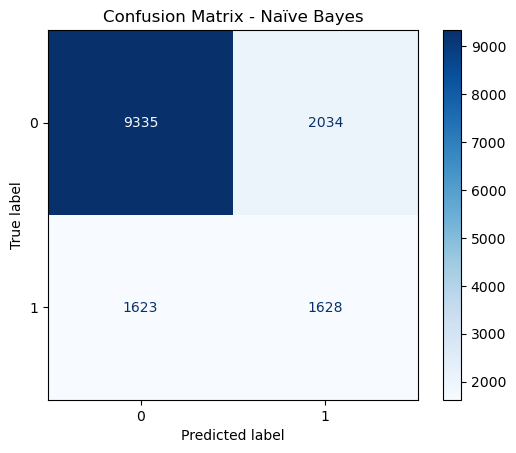

In [178]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Naïve Bayes")
plt.show()

In [179]:
X = df[["Humidity", "Temperature", "Wind Speed", "Pressure"]]
y = df["Rain Tomorrow"]

In [180]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [181]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [182]:
y_pred = model.predict(X_test)

In [183]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.7498632010943912

In [184]:
sample = [[64, 80, 15, 980]]
prediction = model.predict(sample)
print("Prediction (0=No Rain, 1=Rain):", prediction[0])

Prediction (0=No Rain, 1=Rain): 0


c:\Users\Sakthi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


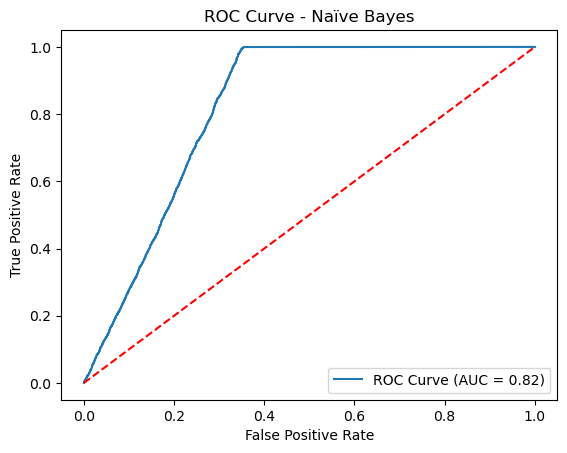

In [191]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc(fpr,tpr):.2f})")
plt.plot([0,1],[0,1],'r--'); plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate"); plt.title("ROC Curve - Naïve Bayes")
plt.legend()
plt.show()


In [186]:
import pickle

filename = "trained_model.sav"
with open(filename, "wb") as f:
    pickle.dump(model, f)

with open(filename, "rb") as f:
    loaded_model = pickle.load(f)